# Homework 2 (KNN)

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart health:

- age           : The person's age in years
- sex           : The person's sex (1 = male, 0 = female)
- cp            : The chest pain experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trtbps        : The person's resting blood pressure (mm Hg on admission to the hospital)
- chol          : The person's cholesterol measurement in mg/dl
- fbs           : The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg       : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- hr            : The person's maximum heart rate achieved
- exng          : Exercise induced angina (1 = yes; 0 = no)
- oldpeak       : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
- slope         : the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- vessels       : The number of major vessels (0 - 4)
- thal          : A blood disorder called thalassemia (0 = normal, 1 = fixed defect, 2 = reversable defect, 3 = unreversable defect)
- heart_disease : Heart disease (0 = no, 1 = yes)


Many of the features come from Electrocardiogram Tests (ECG/EKG), where the electrical rhythms of the heart are measured. Here's an example of an ECG reading:


![ECG Example](ecg.jpg)



### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict whether an incoming patient is likely to have heart disease or not

In this assignment, we will be using K-nearest-neighbors as the classifier

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW2.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [65]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [64]:
data = pd.read_csv("data_hw2.csv")
data.head()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   bp             303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   hr             303 non-null    int64  
 8   exng           303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  vessels        303 non-null    int64  
 12  thall          303 non-null    int64  
 13  heart_disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

There are 303 patients in this data.

First, we want to get our data ready for analysis.

__Q2:__ The categorical variables in the data set are already encoded, but which features would be considered categorical? (I counted 9, including the dependent variable)

The variables that would be considered categorical are sex, cp, fbs, restecg, exng, slope, vessels, thall, and heart_disease.

__Q3:__ How might categorical variables affect a KNN classifier?

The way KNN works is calculating the distance between data and if categorical variable are in the data they are usually coverted into one hot encoding variables. The conversion of categorical variable could have an affect on the accuracy of the data.

Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Once again, look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function to make it readable. Remember, we want the colors to immediately pop out and tell us what's happening without having to read the numbers. It's much easier to see color differences than read a table of numbers. The job of a data scientist is to make data understandable.

<AxesSubplot:>

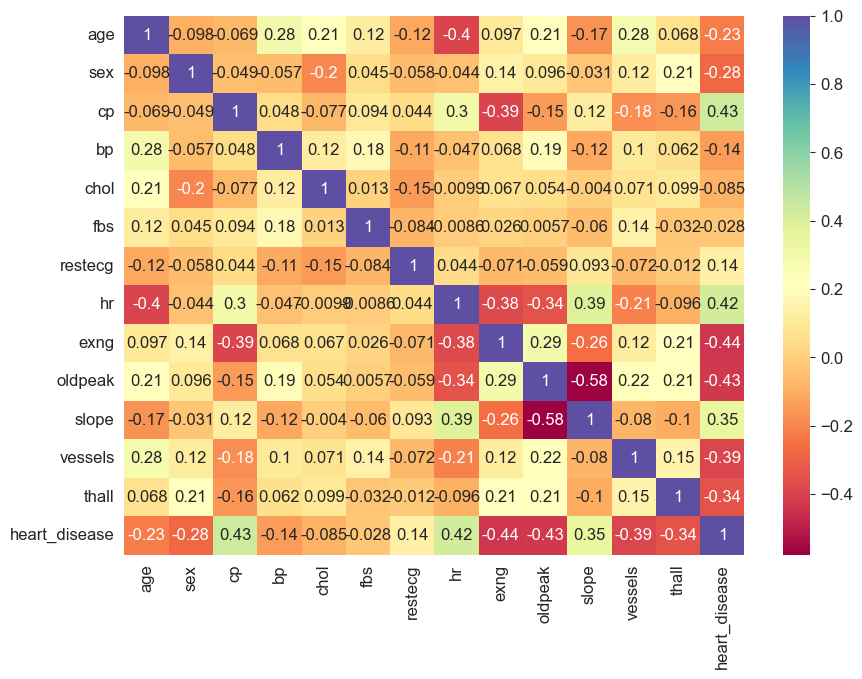

In [4]:
sns.heatmap(data.corr(), annot = True, cmap = "Spectral")

__Q4:__ What sticks out from the heatmap, and what does it tell us about our data, especially heart disease?

The majority of the variables are not strongly correlated. The only variable with somewhat strong correlation is the variable heart_disease with the variables cp, hr, exng, and oldpeak.

__Q5:__ Do you think this correlation matrix is affected at all by the fact that heart_disease is a categorical variable?

More on [understanding correlation](https://www.mathsisfun.com/data/correlation.html)

Yes, categorical variables can have an affect on the correlation since categorical variables are converted into dummy variables and it has non-natural numeric values which could lead to high correlation compared to natural numeric variables.

We have mostly categorical variables in this data set, and on top of that, we are not medical experts, so the exact definition of some features may not be obvious to us. How can we better understand the data like this?

With something like this, I like using [Seaborn violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html), because they are very intuitive.

In my correlation plot, there were 4 variables that had > +/- 0.40 correlation with heart_disease:
- cp
- hr
- exng
- oldpeak

So, let's look at those. Try using a violin plot to create the following images. The features are labeled on the x and y axis. As a tip, make sure the following are included in your function call,

```hue = 'heart_disease'```

```split = True```

Check out the above link to see the documentation for violin plots if you have any questions, or use Google :)

<AxesSubplot:xlabel='cp', ylabel='hr'>

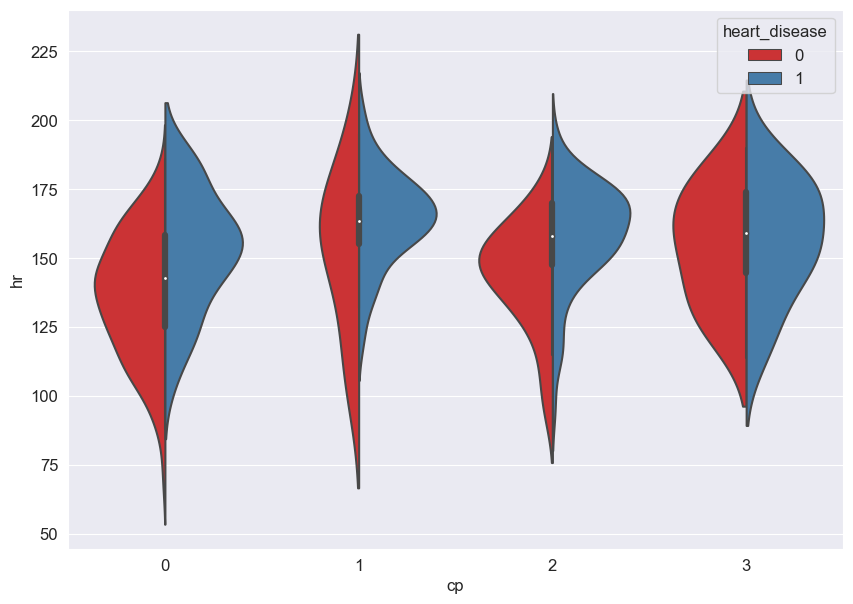

In [5]:
sns.violinplot(x = "cp", y = "hr", hue = "heart_disease", data = data, split = True, palette="Set1")

__Q6:__ What can we learn from the above plot about the relations between the 3 features?

The largest difference is when cp is 1 which has higher chance of heart disease is 1. The median for 4 plots range from 140-165 hr. There are much more outliers when heart disease is 0 and most of the outliers are below 125 hr

<AxesSubplot:xlabel='exng', ylabel='hr'>

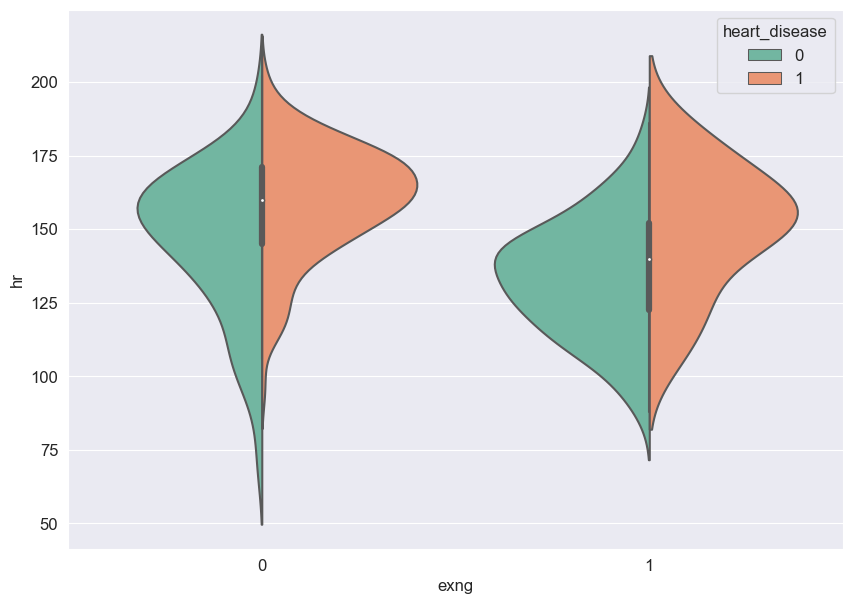

In [6]:
sns.violinplot(x = "exng", y = "hr", hue = "heart_disease", data = data, split = True, palette="Set2")

__Q7:__ What can we learn from the above plot about the relations between the 3 features?

When exng is 0 there is a better chance of heart disease being 1 than 0. There are much more outliers when heart disease is 0 and even more when exng is also 0. The median of the left plot is higher than the right plot by around 30.

<AxesSubplot:xlabel='cp', ylabel='oldpeak'>

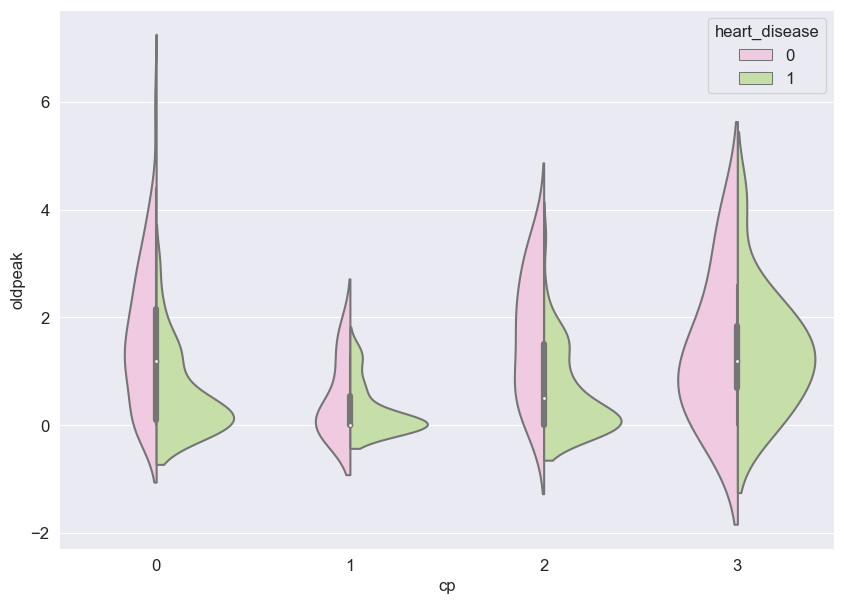

In [7]:
sns.violinplot(x = "cp", y = "oldpeak", hue = "heart_disease", split=True, data = data, palette="PiYG")

__Q8:__ What can we learn from the above plot about the relations between the 3 features?

The chances getting heart disease are much higher than not getting heart disease. There are much more outliers when heart disease is 0 espically when old peak is greater than 2. The Interquantile range is much bigger when cp is 0 compared to the cp values. The median of when cp is 1 is at the almost the bottom of the interquantile range.

<AxesSubplot:xlabel='exng', ylabel='oldpeak'>

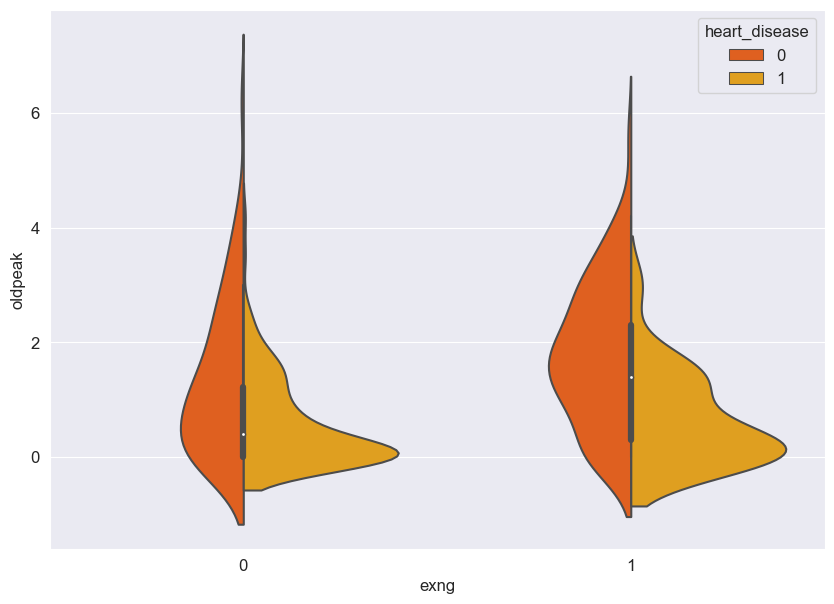

In [8]:
sns.violinplot(x = "exng", y = "oldpeak", hue = "heart_disease", data = data, split = True, palette="autumn")

__Q9:__ What can we learn from the above plot about the relations between the 3 features?

When oldpeak is greater than 2 there are a lot of outliers when heart disease is 0. The probabiltiy of heart disease being 1 are signicantly higher than it being 0. The interquantile range is much bigger when exng is 1 than it is when its 0.

As we can see, using violin plots is a unique and cool way to visualize and help us to comprehend how different features are interacting with one another in our data set. There are many other ways to do it, but being able to understand the data set you have is a really important part of any data science project. Visual representations are also super helpful for our brains to help us intuitively understand the data.

### Part 2: KNN Analysis

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, HW1, the lecture notes, or the just google the specific function to see how to use it.

First, let's split and then scale the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [9]:
x = data.drop("heart_disease", axis = 1)
y = data["heart_disease"]

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_df = pd.DataFrame(data = x_scaled, columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x_df,y, test_size=0.25)
x_df.head()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


__Q10:__ What test_size did you decide to use?

The training size is 0.75 and the test size is 0.25

Now, we want to actually run the KNN analysis. Using KNeighborsClassifier and a for loop, run KNN using different values of k, from 2 -> 25. Print them out as they are run.

Make sure to save the accuracies in a list or array, as they will be used later.

In [10]:
accScore = []
for i in range(2,25):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    yo = knn.score(x_test,y_test)
    print("k = ", i, "    Accuracy = ",yo)
    accScore.append(yo)


k =  2     Accuracy =  0.75
k =  3     Accuracy =  0.7763157894736842
k =  4     Accuracy =  0.7631578947368421
k =  5     Accuracy =  0.8026315789473685
k =  6     Accuracy =  0.8157894736842105
k =  7     Accuracy =  0.7631578947368421
k =  8     Accuracy =  0.7763157894736842
k =  9     Accuracy =  0.7368421052631579
k =  10     Accuracy =  0.7368421052631579
k =  11     Accuracy =  0.7368421052631579
k =  12     Accuracy =  0.75
k =  13     Accuracy =  0.7631578947368421
k =  14     Accuracy =  0.7631578947368421
k =  15     Accuracy =  0.7631578947368421
k =  16     Accuracy =  0.7631578947368421
k =  17     Accuracy =  0.75
k =  18     Accuracy =  0.75
k =  19     Accuracy =  0.75
k =  20     Accuracy =  0.7631578947368421
k =  21     Accuracy =  0.7631578947368421
k =  22     Accuracy =  0.7631578947368421
k =  23     Accuracy =  0.7631578947368421
k =  24     Accuracy =  0.7631578947368421


Now, do the same thing as above, but try using a different distance function (try 'cosine') as part of the KNearestNeighbors function.

In [14]:
accScore_cosine = []
for i in range(2,25):
    knn = KNeighborsClassifier(i, metric="cosine")
    knn.fit(x_train,y_train)
    yo = knn.score(x_test,y_test)
    print("k = ", i, "    Accuracy = ",yo)
    accScore_cosine.append(yo)


k =  2     Accuracy =  0.7894736842105263
k =  3     Accuracy =  0.8157894736842105
k =  4     Accuracy =  0.7894736842105263
k =  5     Accuracy =  0.7894736842105263
k =  6     Accuracy =  0.8157894736842105
k =  7     Accuracy =  0.7894736842105263
k =  8     Accuracy =  0.7894736842105263
k =  9     Accuracy =  0.75
k =  10     Accuracy =  0.7631578947368421
k =  11     Accuracy =  0.7368421052631579
k =  12     Accuracy =  0.7368421052631579
k =  13     Accuracy =  0.7631578947368421
k =  14     Accuracy =  0.75
k =  15     Accuracy =  0.7631578947368421
k =  16     Accuracy =  0.75
k =  17     Accuracy =  0.7368421052631579
k =  18     Accuracy =  0.75
k =  19     Accuracy =  0.7368421052631579
k =  20     Accuracy =  0.75
k =  21     Accuracy =  0.75
k =  22     Accuracy =  0.75
k =  23     Accuracy =  0.75
k =  24     Accuracy =  0.75


Finally, choose your own distance function from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics). Make sure to save these accuracies as well

In [15]:
accScore_manhattan = []
for i in range(2,25):
    knn = KNeighborsClassifier(i, metric = "manhattan")
    knn.fit(x_train,y_train)
    yo = knn.score(x_test,y_test)
    print("k = ", i, "    Accuracy = ",yo)
    accScore_manhattan.append(yo)


k =  2     Accuracy =  0.7631578947368421
k =  3     Accuracy =  0.8289473684210527
k =  4     Accuracy =  0.8289473684210527
k =  5     Accuracy =  0.7763157894736842
k =  6     Accuracy =  0.8026315789473685
k =  7     Accuracy =  0.8026315789473685
k =  8     Accuracy =  0.8026315789473685
k =  9     Accuracy =  0.8157894736842105
k =  10     Accuracy =  0.8026315789473685
k =  11     Accuracy =  0.8289473684210527
k =  12     Accuracy =  0.8157894736842105
k =  13     Accuracy =  0.8026315789473685
k =  14     Accuracy =  0.8026315789473685
k =  15     Accuracy =  0.8157894736842105
k =  16     Accuracy =  0.8026315789473685
k =  17     Accuracy =  0.8157894736842105
k =  18     Accuracy =  0.8026315789473685
k =  19     Accuracy =  0.8026315789473685
k =  20     Accuracy =  0.8026315789473685
k =  21     Accuracy =  0.8157894736842105
k =  22     Accuracy =  0.8157894736842105
k =  23     Accuracy =  0.8157894736842105
k =  24     Accuracy =  0.8289473684210527


Now, plot the three different accuracies using SeaBorn lineplots on a single graph/ax. The first line has been added to help you begin. Not all the details have to be shown as the one below, but the graph should still make sense and be readable. You also might use a different distance metric for the 2nd and 3rd models, so it's okay if that's different.

If you want to learn more about how Seaborn/Matplotlib graphs work, check out the documentation.

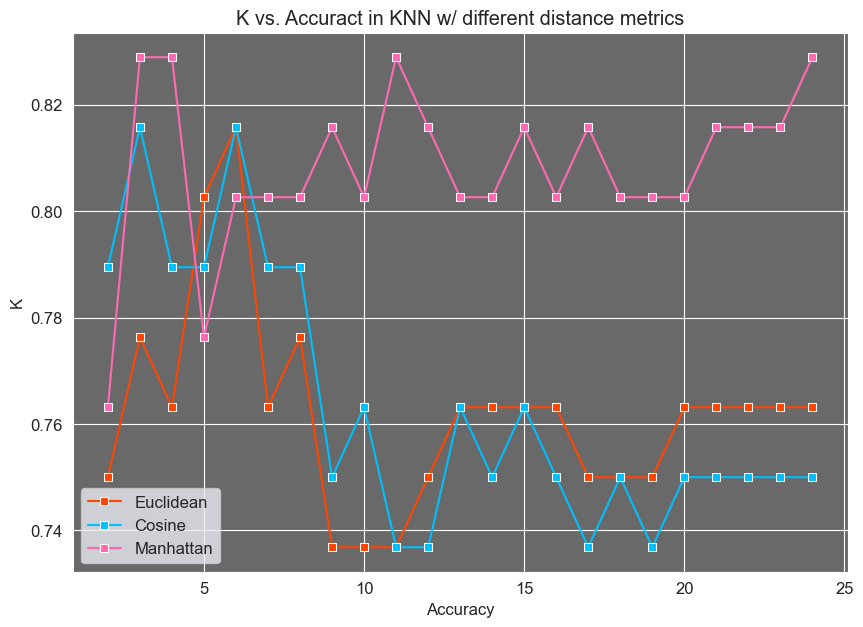

In [60]:
ax = plt.axes()
ax.set_facecolor("dimgrey")
sns.lineplot(x = range(2,25), y = accScore, marker = "s", label = "Euclidean",color="orangered")
sns.lineplot(x = range(2,25), y = accScore_cosine, marker = "s", label = "Cosine",color="deepskyblue")
sns.lineplot(x = range(2,25), y = accScore_manhattan, marker = "s", label = "Manhattan", color="hotpink")

plt.title("K vs. Accuract in KNN w/ different distance metrics")
plt.xlabel("Accuracy")
plt.ylabel("K")
plt.show()

__Q11:__ Which distance function worked best for you? What do you think the benefit of using different distance functions might be? 

The Manhattan distance metric had the best accuracy out of the three distance metrics. The benefits of using different distance functions could be that some different metrics can have better accuracy from other metrics. The other thing that is beneficial for using different distance metrics is  it could show different relationships with the variables with the different metrics.

Do any another analysis you see fit or are curious about. Extra work is often rewarded with bonus points!

Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

The data included attributes about a person's health whether they could get heart disease or not which include 303 patients and also included nine categorical variables which have then been converted into dummy variables. I then checked the relationships between variables which had high correlation with heart disease. After analyzing the relationships with variables I then scaled the data using MinMax Scaler and then fit the data using the K-Nearest Neighbor Classifier model. The results of the models had very high accuracy scores when the k values was low with all the different distance metrics used.